<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/MM-749-Statistics-and-Probability/blob/main/Multiple_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiple linear regression analysis source: https://www.youtube.com/watch?v=M32ghIt1c88

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [ ]:
# Import the data into pandas DataFrame
original_df = pd.read_csv('/content/Metallic_Glass_Forming_with_features.csv')
original_X_df = original_df.iloc[:, 3:]
display(original_X_df)

,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,BoilingT_difference,HeatVaporization_difference,MeltingT_difference,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_Density,Site1_HeatCapacityMass,Site1_HeatFusion,Site1_IsDBlock,Site1_IsTransitionMetal,Site1_NdValence,Site1_SpecificHeatCapacity
0,0.579069,-0.585600,1.029882,1.029882,0.589536,0.217571,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
1,0.748401,-0.585600,1.029882,1.029882,1.176250,0.653969,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
2,0.804845,-0.585600,1.029882,1.029882,1.371822,0.799435,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
3,0.821973,-0.585600,1.029882,1.029882,1.176250,0.653969,0.563915,0.544521,0.505748,-0.235600,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
4,-0.860992,-0.585600,-0.998961,-0.998961,-0.437214,-0.613663,-1.684370,-1.368929,-1.228445,-1.429884,1.005911,0.857849,-1.745035,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.317680,-0.884994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,-0.767293,-0.585600,-0.062572,-0.062572,-1.512857,-1.382555,0.563915,0.168905,0.176059,-0.737742,-1.122328,-1.165706,0.264503,-0.047884,-0.727979,1.682120,0.718014,0.718014,-0.621547,-0.725924
581,0.147353,0.045876,0.780178,0.780178,-0.368764,-0.426635,0.563915,0.109147,0.220140,0.230071,-1.122328,0.857849,0.264503,-0.047884,-0.727979,1.682120,0.718014,0.718014,-0.621547,-0.725924
582,0.147072,0.045876,0.780178,0.780178,-0.417657,-0.447416,0.563915,0.109147,0.220140,0.230071,-1.122328,0.857849,0.264503,-0.047884,-0.727979,1.682120,0.718014,0.718014,-0.621547,-0.725924
583,0.146678,0.045876,0.780178,0.780178,-0.486107,-0.476509,0.563915,0.109147,0.220140,0.230071,-1.654388,-1.165706,-0.740266,-0.047884,-0.727979,1.682120,0.718014,0.718014,-0.621547,-0.725924


# Dropping features based on VIF


Text(0.5, 1.0, 'Correlation Matrix for Metallic Glasses GFA')

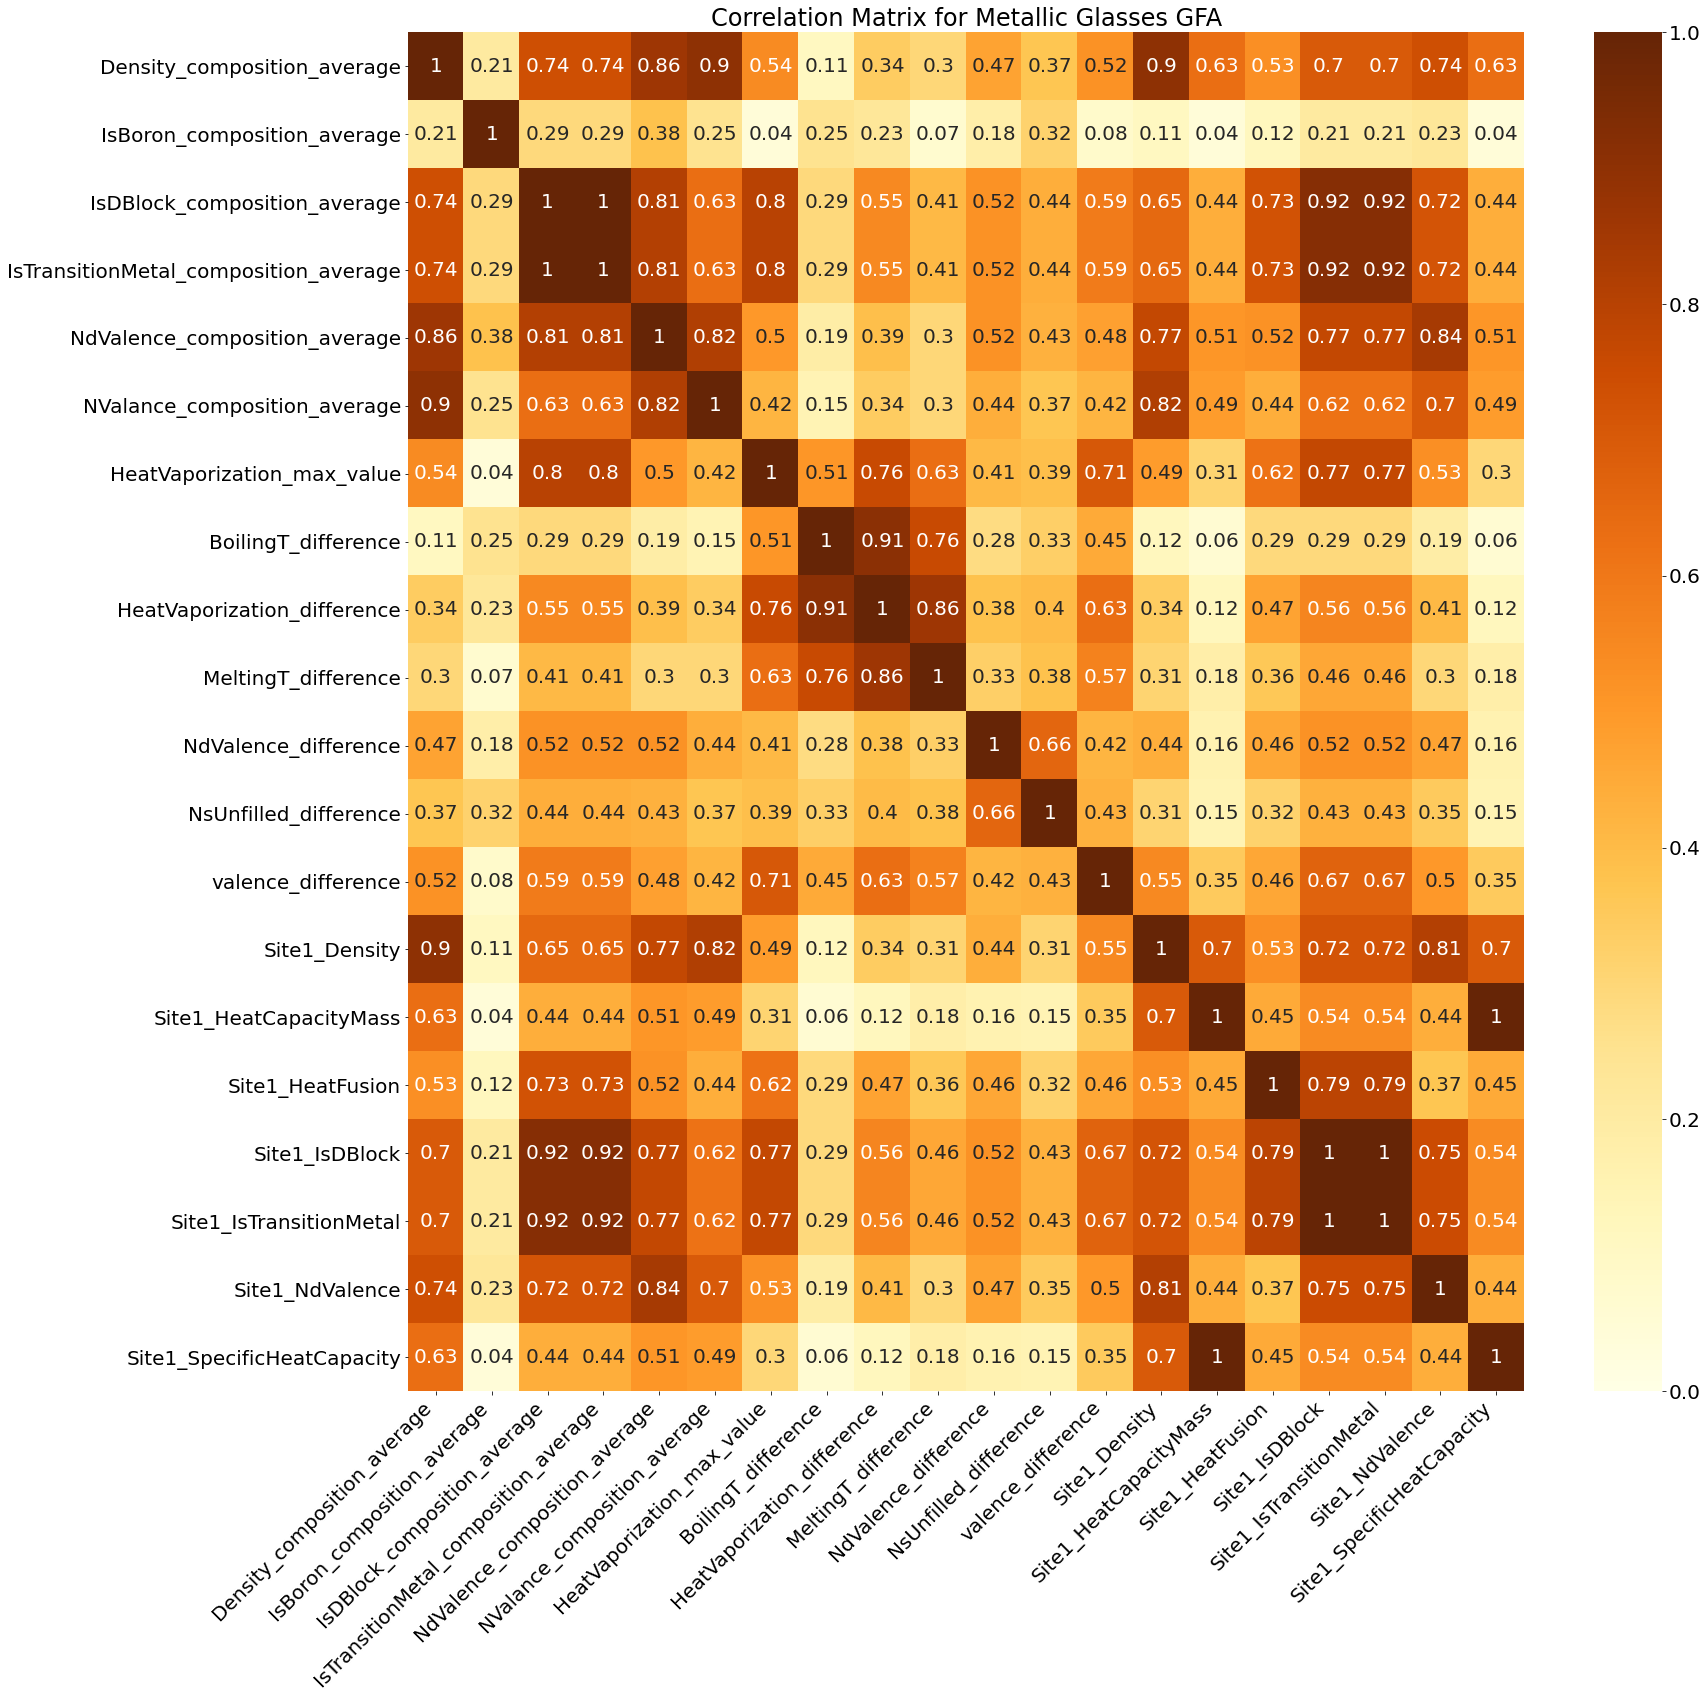

In [ ]:
# Calculate the correlations
column_names = original_X_df.columns.values
correlation_matrix = original_X_df[column_names].corr().round(2)

# Plot correlation heatmap
plt.rcParams['font.size'] = 20
plt.figure(figsize = (25, 25))
correlation_matrix_heatmap = sns.heatmap(abs(correlation_matrix), annot=True, cmap='YlOrBr', center=0.5, vmin=0, vmax=1)
correlation_matrix_heatmap.set_xticklabels(correlation_matrix_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Correlation Matrix for Metallic Glasses GFA")

Correlated variables:
1. HeatVaporization_difference - BoilingT_difference
2. Site1_IsDBlock - IsDBlock_composition_average - IsTransitionMetal_composition_average - Site1_IsTransitionMetal
3. IsTransitionMetal_composition_average - IsDBlock_composition_average
4. Density_composition_average - NValence_composition_average - Site1_Density
5. Site1_HeatCapacityMass - Site1_SpecificHeatCapacity

In [ ]:
X1_df = sm.tools.add_constant(original_X_df)

# Create a series
original_VIF_series = pd.Series([round(variance_inflation_factor(X1_df.values, i),2) for i in range(X1_df.shape[1])], index=X1_df.columns, name='VIF')

# Display the series
print('VIF series before dropping the features with high VIF')
print('-'*100)
original_VIF_df = original_VIF_series.to_frame()
original_VIF_df.index.name = 'Features'
display(original_VIF_df)





VIF series before dropping the features with high VIF
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF
Features,
const,1.00
Density_composition_average,28.93
IsBoron_composition_average,2.29
IsDBlock_composition_average,inf
IsTransitionMetal_composition_average,inf
NdValence_composition_average,14.53
NValance_composition_average,7.44
HeatVaporization_max_value,13.53
BoilingT_difference,14.57


In [ ]:
# Drop the features with VIF higher than 5 iteratively by observing VIF values and correlated features in the correlation heatmap
X_VIF_cleaned_df = original_X_df.drop(['Density_composition_average', 'Site1_Density', 'IsTransitionMetal_composition_average' 
                                       , 'Site1_IsDBlock', 'Site1_IsTransitionMetal', 'HeatVaporization_difference',
                                       'NdValence_composition_average', 'Site1_SpecificHeatCapacity'], axis=1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X2_df = sm.tools.add_constant(X_VIF_cleaned_df)

# Create the series
cleaned_VIF_series = pd.Series([round(variance_inflation_factor(X2_df.values, i), 2) for i in range(X2_df.shape[1])], index=X2_df.columns, name='VIF')

# Display the series
print('VIF series after dropping the features with high VIF')
print('-'*100)
cleaned_VIF_df = cleaned_VIF_series.to_frame()

display(cleaned_VIF_df)

VIF series after dropping the features with high VIF
----------------------------------------------------------------------------------------------------


,VIF
const,1.00
IsBoron_composition_average,1.69
IsDBlock_composition_average,8.42
NValance_composition_average,2.39
HeatVaporization_max_value,5.81
BoilingT_difference,3.44
MeltingT_difference,3.42
NdValence_difference,2.40
NsUnfilled_difference,2.15
valence_difference,2.37


Many features correlated with 'IsDBlock_composition_average' were removed. So 'IsDBlock_composition_average' was kept even with VIF of 8. VIF <10 is acceptable.

# Train-test split and build model

In [ ]:
# Define our input and target variable
X = X_VIF_cleaned_df
y = original_df['Trg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=1)

# Create instance of the model
regression_model = LinearRegression()

# Fit the model
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Get the coefficient and intercept of the model 
intercept = regression_model.intercept_
coefficent = regression_model.coef_[0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 0.5772
----------------------------------------------------------------------------------------------------
The Coefficient for IsBoron_composition_average is -0.0067
The Coefficient for IsDBlock_composition_average is 0.0066
The Coefficient for NValance_composition_average is -0.002
The Coefficient for HeatVaporization_max_value is -0.0096
The Coefficient for BoilingT_difference is 0.012
The Coefficient for MeltingT_difference is 0.00013
The Coefficient for NdValence_difference is 0.0024
The Coefficient for NsUnfilled_difference is 0.0013
The Coefficient for valence_difference is 0.0046
The Coefficient for Site1_HeatCapacityMass is -0.011
The Coefficient for Site1_HeatFusion is 0.0018
The Coefficient for Site1_NdValence is 0.004


In [ ]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first five
y_predict[:5]

array([0.60613783, 0.59281259, 0.56325472, 0.48868357, 0.56337713])

# Evauluation of the model
1. Rebuild the model using statmodel for easier analysis later

## Tests for heteroscedasticity
1. White's test (unique case)
2. Breusch-Pagan test (more general)

*   H0 = σ2i = σ2
*   H1 = σ2i ≠ σ2




In [ ]:
# define our intput
X = sm.add_constant(X_VIF_cleaned_df)
Y = original_df['Trg']

# create a OLS model
model = sm.OLS(Y, X)

# fit the data
est = model.fit()

In [ ]:
# Run the White's test
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog, retres = False)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")

# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

0.4002336279645172 0.4029529858845586
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 0.4002
We fail to reject the null hypthoesis, so there is no heterosecdasticity. 

0.6087999621976856 0.6133169612956474
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.6088
We fail to reject the null hypthoesis, so there is no heterosecdasticity.


## Test for Autocorrelation
Checking if the assumption of random errors is correct.


*   H0: The data are random.
*   Ha: The data are not random.



The number of lags will be 10
----------------------------------------------------------------------------------------------------
The p-value found for Breusch Godfrey Lagrange Multiplier test was 1.833350521787346e-17
The p-value found for Ljung-Box test was 5.356e-32
We reject the null hypthoesis, so there is autocorrelation.
----------------------------------------------------------------------------------------------------


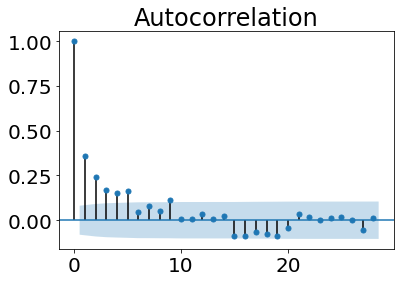

In [ ]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
lm_bg, pval_bg, fval_bg, fpval_bg  = diag.acorr_breusch_godfrey(est, nlags = lag, store = False)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

print(f'The p-value found for Breusch Godfrey Lagrange Multiplier test was {pval_bg}')



# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The p-value found for Ljung-Box test was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The p-value found for Ljung-Box test was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

In [ ]:
sm.stats.acorr_ljungbox(est.resid, lags=lag)

(array([ 75.43823623, 109.49960421, 125.99652598, 140.00954089,
        155.5777026 , 156.89400207, 160.59179249, 162.31403266,
        170.29503956, 170.33140644]),
 array([3.77017794e-18, 1.66902584e-24, 3.94210430e-27, 2.80932521e-29,
        8.66599045e-32, 2.69211836e-31, 2.40798838e-31, 5.24726401e-31,
        5.35631881e-32, 2.36857899e-31]))

## Check for normality of residuals

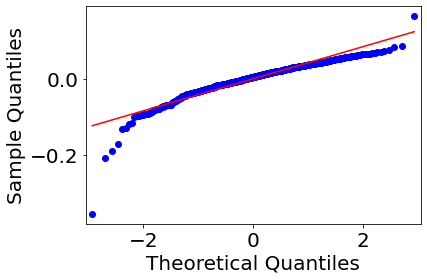

The mean of the residuals is -1.014e-16


In [ ]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

## Measures of errors

In [ ]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(round(model_mse,3)))
print("MAE {:.3}".format(round(model_mae,3)))
print("RMSE {:.3}".format(round(model_rmse,3)))

MSE 0.002
MAE 0.035
RMSE 0.042


## Coefficient of determination

In [ ]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: -0.024


## Confidence interval of the estimates

In [ ]:
# make some confidence intervals, 95% by default
est.conf_int()

,0,1
const,0.573929,0.580848
IsBoron_composition_average,-0.011679,-0.002688
IsDBlock_composition_average,-0.004647,0.015435
NValance_composition_average,-0.007240,0.003450
HeatVaporization_max_value,-0.016197,0.000481
BoilingT_difference,0.005039,0.017869
MeltingT_difference,-0.006541,0.006246
NdValence_difference,-0.002971,0.007757
NsUnfilled_difference,-0.003165,0.006987
valence_difference,-0.001113,0.009541


## Hypothesis testing on the estimators

In [ ]:
# estimate the p-values
est.pvalues

const                           0.000000
IsBoron_composition_average     0.001784
IsDBlock_composition_average    0.291798
NValance_composition_average    0.486421
HeatVaporization_max_value      0.064707
BoilingT_difference             0.000489
MeltingT_difference             0.963894
NdValence_difference            0.381318
NsUnfilled_difference           0.459993
valence_difference              0.120767
Site1_HeatCapacityMass          0.000020
Site1_HeatFusion                0.535430
Site1_NdValence                 0.250500
dtype: float64

## Summary of the model output

In [ ]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    Trg   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     15.01
Date:                Tue, 11 May 2021   Prob (F-statistic):           1.42e-27
Time:                        03:58:09   Log-Likelihood:                 1022.7
No. Observations:                 585   AIC:                            -2019.
Df Residuals:                     572   BIC:                            -1963.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Removing insignificant variables

In [ ]:

# define our input variable (X) & output variable
X_iteration_2_df = X_VIF_cleaned_df.drop(['IsDBlock_composition_average', 'NValance_composition_average', 'HeatVaporization_max_value',
                                          'MeltingT_difference', 'NdValence_difference', 'NsUnfilled_difference', 'valence_difference',
                                          'Site1_HeatFusion', 'Site1_NdValence'], axis = 1)

X = X_iteration_2_df
Y = original_df['Trg']

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    Trg   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 11 May 2021   Prob (F-statistic):           3.87e-30
Time:                        03:58:12   Log-Likelihood:                 1013.0
No. Observations:                 585   AIC:                            -2018.
Df Residuals:                     581   BIC:                            -2001.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Save the model for future use

In [ ]:
import pickle

# pickle the model
with open('my_mulitlinear_regression.sav','wb') as f:
     pickle.dump(regression_model, f)

# load it back in
with open('my_mulitlinear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

# make a new prediction
regression_model_2.predict([X_test.loc[5]])

KeyError: ignored